In [2]:
% matplotlib inline
import matplotlib.pyplot as plt

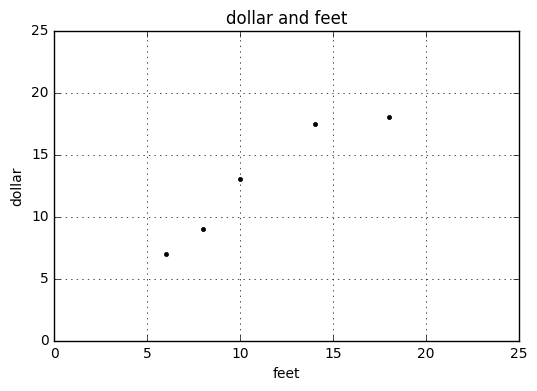

In [3]:
def runplt():
    plt.figure()
    plt.title('dollar and feet')
    plt.xlabel('feet')
    plt.ylabel('dollar')
    plt.axis([0, 25, 0, 25])
    plt.grid( True )
    return plt
plt = runplt()
x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(x, y, 'k.')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
# 创建并拟合模型
model = LinearRegression()
model.fit(x, y)
ret = model.predict([[3],[12],[15]])
print('预测价格:3 = $%.2f ; 12 = $%.2f ; 15 = $%.2f' % (ret[0] , ret[1] , ret[2]) )

预测价格:3 = $4.89 ; 12 = $13.68 ; 15 = $16.61


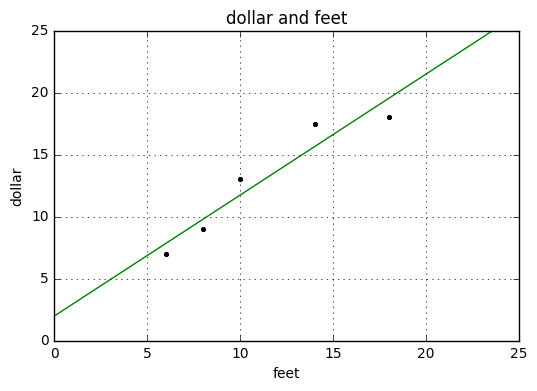

In [5]:
plt = runplt()
plt.plot(x, y, 'k.')
x2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(x, y)
y2 = model.predict(x2)
plt.plot(x, y, 'k.')
plt.plot(x2, y2, 'g-')
plt.show()

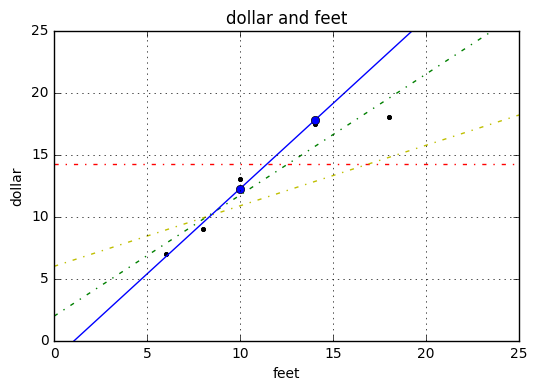

In [6]:
plt = runplt()
plt.plot(x, y, 'k.')
y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2 * 0.5 + 5
model.fit(x[1:-1], y[1:-1])
#model.fit(x, y)
y5 = model.predict(x2)
plt.plot(x, y, 'k.')
plt.plot(x2, y2, 'g-.')
plt.plot(x2, y3, 'r-.')
plt.plot(x2, y4, 'y-.')
plt.plot(x2, y5, 'o-')
plt.show()

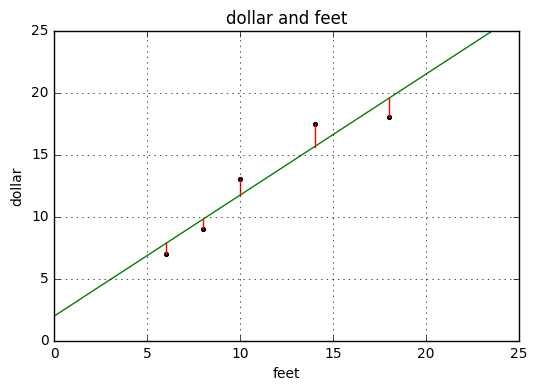

In [7]:
plt = runplt()
plt.plot(x, y, 'k.')
x2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(x, y)
y2 = model.predict(x2)
plt.plot(x, y, 'k.')
plt.plot(x2, y2, 'g-')
# 残差预测值
yr = model.predict(x)
for idx, xi in enumerate(x):
    plt.plot([xi, xi], [y[idx], yr[idx]], 'r-')
plt.show()

In [8]:
import numpy as np
print('残差平方和: %.2f' % np.mean((model.predict(x) - y) ** 2))

残差平方和: 1.75


In [9]:
#朴素的方差计算方法
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4
print(variance)

23


In [10]:
#使用numpy的简易方差计算方案
myX = np.array([6,8,10,14,18])
myvar = ((myX - myX.mean())**2).sum() / 4
print( myvar )

23.2


In [11]:
#使用var方法的更加直接的方差计算方法
print(np.var(myX, ddof=1))

23.2


In [12]:
#协方差
myY = np.array([7 , 9 , 13 , 17.5 , 18])
mycov = (((myX - myX.mean()) * (myY - myY.mean())).sum() / (len(myX) - 1))
print(mycov)


22.65


In [13]:
#使用cov方法
print(np.cov(myX, myY))
print(np.cov(myX, myY)[0][1])

[[ 23.2   22.65]
 [ 22.65  24.3 ]]
22.65


In [18]:
# 测试集
x_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
#y_test = [[1], [1], [2], [18], [11]]
model = LinearRegression()
model.fit(x, y)
model.score(x_test, y_test)

0.6620052929422553

In [26]:
from numpy.linalg import inv
from numpy import dot, transpose
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

from numpy.linalg import lstsq
print("lstsq:")
print(lstsq(X, y)[0])

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]
lstsq:
[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [27]:
from sklearn.linear_model import LinearRegression
x = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(x, y)
x_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(x_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
print('R-squared: %.2f' % model.score(x_test, y_test))

Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]
R-squared: 0.77


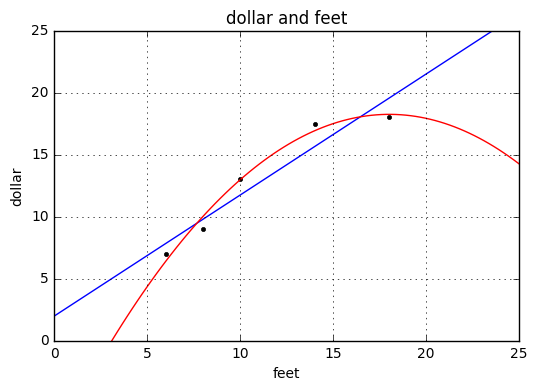

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
一元线性回归 r-squared
0.809726797708
二次回归 r-squared
0.867544365635


In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt = runplt()
plt.plot(X_train, y_train, 'k.')
plt.plot(xx, yy)
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('一元线性回归 r-squared')
print(regressor.score(X_test, y_test))
print('二次回归 r-squared')
print(regressor_quadratic.score(X_test_quadratic, y_test))